# Energy A.I. Hackathon 2021 Workflow - Team Anticline
## Variogram Modeling
#### Authors: Esmail Eltahan, Jeon Jonghyeon, Mehran Mehrabi, and Wen Pan, Hildebrand Department of Petroleum and Geosystems Engineering. 
#### The University of Texas at Austin, Austin, Texas USA 

<img src="anticline_official_logo.png" width=300 />



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geostatspy.geostats as geostats
import geostatspy.GSLIB as GSLIB
import random                             # bootstrap
import math
import scipy                              # statistics
import scipy.linalg                       # linear algebra library

## Summary of Results

### Porosity Variograms 

In [144]:
# parameters for shale variogram
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 1400; hmin1 = 1100
por_0_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)

# parameters for sandy shale variogram
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 90; hmaj1 = 1600; hmin1 = 1000
por_1_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)

# parameters for shaly sand variogram
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 1500; hmin1 = 1500
por_2_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)

# parameters for sand variogram
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 1600; hmin1 = 1100
por_3_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)

### Permeability Variograms

In [2]:
# parameters for shale variogram
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 0; hmaj1 = 1600; hmin1 = 1300
perm_0_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)

# parameters for sandy shale variogram
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 0; hmaj1 = 1800; hmin1 = 1400
perm_1_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)

# parameters for shaly sand variogram
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 0; hmaj1 = 2000; hmin1 = 1000
perm_2_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)

# parameters for sand variogram
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 90; hmaj1 = 1300; hmin1 = 900
perm_3_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), Variogram experimental modeling from [GeostatsGuy GitHub] https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_variogram_calculation.ipynb 

In [2]:
import math

def vmodel(
    nlag,
    xlag,
    azm,
    vario
):
    """GSLIB's VMODEL program (Deutsch and Journel, 1998) converted from the
    original Fortran to Python by Michael Pyrcz, the University of Texas at
    Austin (Mar, 2019).
    :param nlag: number of variogram lags 
    :param xlag: size of the lags
    :param axm: direction by 2D azimuth, 000 is y positive, 090 is x positive 
    :param vario: dictionary with the variogram parameters
    :return:
    """
    
# Parameters
    MAXNST=4
    DEG2RAD=3.14159265/180.0 
    MAXROT=MAXNST+1
    EPSLON = 1.0e-20
    VERSION= 1.01
  
# Declare arrays
    index = np.zeros(nlag+1)
    h = np.zeros(nlag+1)
    gam = np.zeros(nlag+1)
    cov = np.zeros(nlag+1)
    ro = np.zeros(nlag+1)
    
# Load the variogram
    nst = vario["nst"]
    cc = np.zeros(nst)
    aa = np.zeros(nst)
    it = np.zeros(nst)
    ang = np.zeros(nst)
    anis = np.zeros(nst)
    
    c0 = vario["nug"]
    cc[0] = vario["cc1"]
    it[0] = vario["it1"]
    ang[0] = vario["azi1"]
    aa[0] = vario["hmaj1"]
    anis[0] = vario["hmin1"] / vario["hmaj1"]
    if nst == 2:
        cc[1] = vario["cc2"]
        it[1] = vario["it2"]
        ang[1] = vario["azi2"]
        aa[1] = vario["hmaj2"]
        anis[1] = vario["hmin2"] / vario["hmaj2"]
                    
    xoff = math.sin(DEG2RAD*azm)*xlag
    yoff = math.cos(DEG2RAD*azm)*xlag
    print(' x,y,z offsets = ' + str(xoff) + ',' + str(yoff))
    rotmat, maxcov = geostats.setup_rotmat(c0, nst, it, cc, ang, 99999.9)   
          
    
    xx = 0.0; yy = 0.0      
    for il in range(0,nlag+1):
        index[il] = il
        cov[il] = geostats.cova2(0.0,0.0,xx,yy,nst,c0,9999.9,cc,aa,it,ang,anis,rotmat,maxcov)
        gam[il] = maxcov - cov[il]
        ro[il]  = cov[il]/maxcov
        h[il]   = math.sqrt(max((xx*xx+yy*yy),0.0))
        xx = xx + xoff
        yy = yy + yoff

# finished
    return index,h,gam,cov,ro
    

In [3]:
train_static_well_dat=pd.read_csv('wellbore_data_preproduction_well.csv')
test_static_well_dat=pd.read_csv('wellbore_data_producer_wells.csv')

In [4]:
static_well_dat=pd.concat([train_static_well_dat,test_static_well_dat])
static_well_dat.rename(columns = {'X, m':'X', 'Y, m': 'Y', 'Depth, m':'Depth','Porosity, fraction':'Porosity', 'Rock facies': 'Facies','Density, g/cm3': 'Density','Acoustic Impedance, kg/s-m^2': 'AI','Permeability, mD': 'Perm'}, inplace = True)

In [5]:
# add layer as a feature
static_well_dat['layer']=np.arange(static_well_dat.shape[0])%20

In [6]:
litho_keys = {'Shale':0,
                     'Sandy shale':1,
                     'Shaly sandstone': 2,
                     'Sandstone': 3}
static_well_dat['lith_id'] = static_well_dat['Facies'].map(litho_keys)


In [7]:
static_well_dat.tail(40)
N=np.unique(static_well_dat['Well_ID']).size
N_features=static_well_dat.shape[-1]

In [8]:
static_well_dat_per_well=(static_well_dat.values).reshape([N,-1,N_features])

In [9]:
# cloud transform
static_well_dat.keys()

Index(['Well_ID', 'X', 'Y', 'Depth', 'Porosity', 'Perm', 'AI', 'Facies',
       'Density', 'Compressible velocity, m/s', 'Youngs modulus, GPa',
       'Shear velocity, m/s', 'Shear modulus, GPa', 'layer', 'lith_id'],
      dtype='object')

In [10]:
static_well_dat['Log Perm']=np.log(static_well_dat['Perm'])

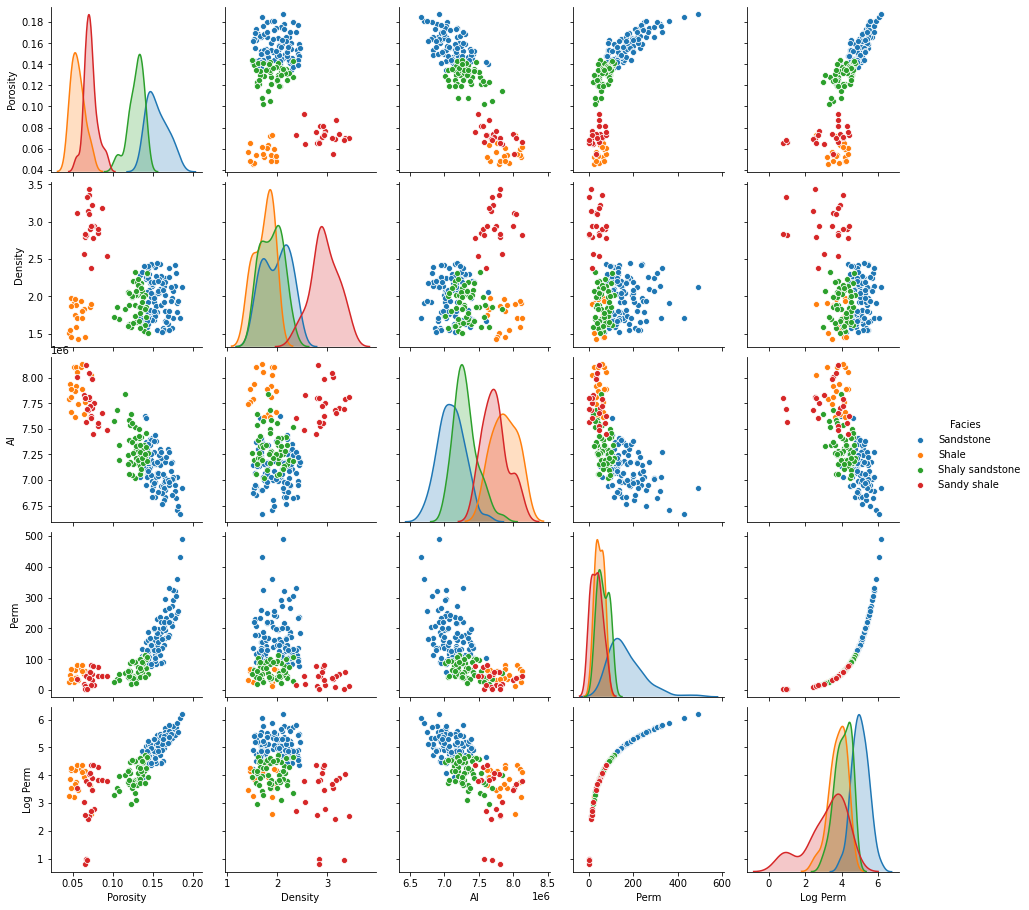

In [11]:
sns.pairplot(static_well_dat[['Porosity','Density','Facies','AI','Perm', 'Log Perm']].dropna(axis=0,how='any'), hue="Facies")


In [14]:
tmin = -9999.; tmax = 9999.                             # no trimming 
lag_dist = 500.0; lag_tol = 500.0; nlag = 7;            # maximum lag is 700m and tolerance > 1/2 lag distance for smoothing
bandh = 9999.9; atol = 22.5                             # no bandwidth, directional variograms
isill = 1                                               # standardize sill
azi_mat = [0,22.5,45,67.5,90,112.5,135,157.5]           # directions in azimuth to consider

## Porosity Variograms 

In [103]:
df = static_well_dat[~np.isnan(static_well_dat['Porosity'])].copy()

df_3 = pd.DataFrame.copy(df[df['lith_id'] == 3]).reset_index()
df_2 = pd.DataFrame.copy(df[df['lith_id'] == 2]).reset_index()
df_1 = pd.DataFrame.copy(df[df['lith_id'] == 1]).reset_index()
df_0 = pd.DataFrame.copy(df[df['lith_id'] == 0]).reset_index()

df_3 =df_3.groupby('Well_ID').mean().copy()
df_2 =df_2.groupby('Well_ID').mean().copy()
df_1 =df_1.groupby('Well_ID').mean().copy()
df_0 =df_0.groupby('Well_ID').mean().copy()


df_3['NPor'], tvPor_3, tnsPor_3 = geostats.nscore(df_3, 'Porosity')  # nscore transform for sand facies porosity 
df_2['NPor'], tvPor_2, tnsPor_2 = geostats.nscore(df_2, 'Porosity')  # nscore transform for mixedsand facies porosity
df_1['NPor'], tvPor_1, tnsPor_1 = geostats.nscore(df_1, 'Porosity')  # nscore transform for mixedshale facies porosity
df_0['NPor'], tvPor_0, tnsPor_0 = geostats.nscore(df_0, 'Porosity')  # nscore transform for shale facies porosity



### Porosity - Shale

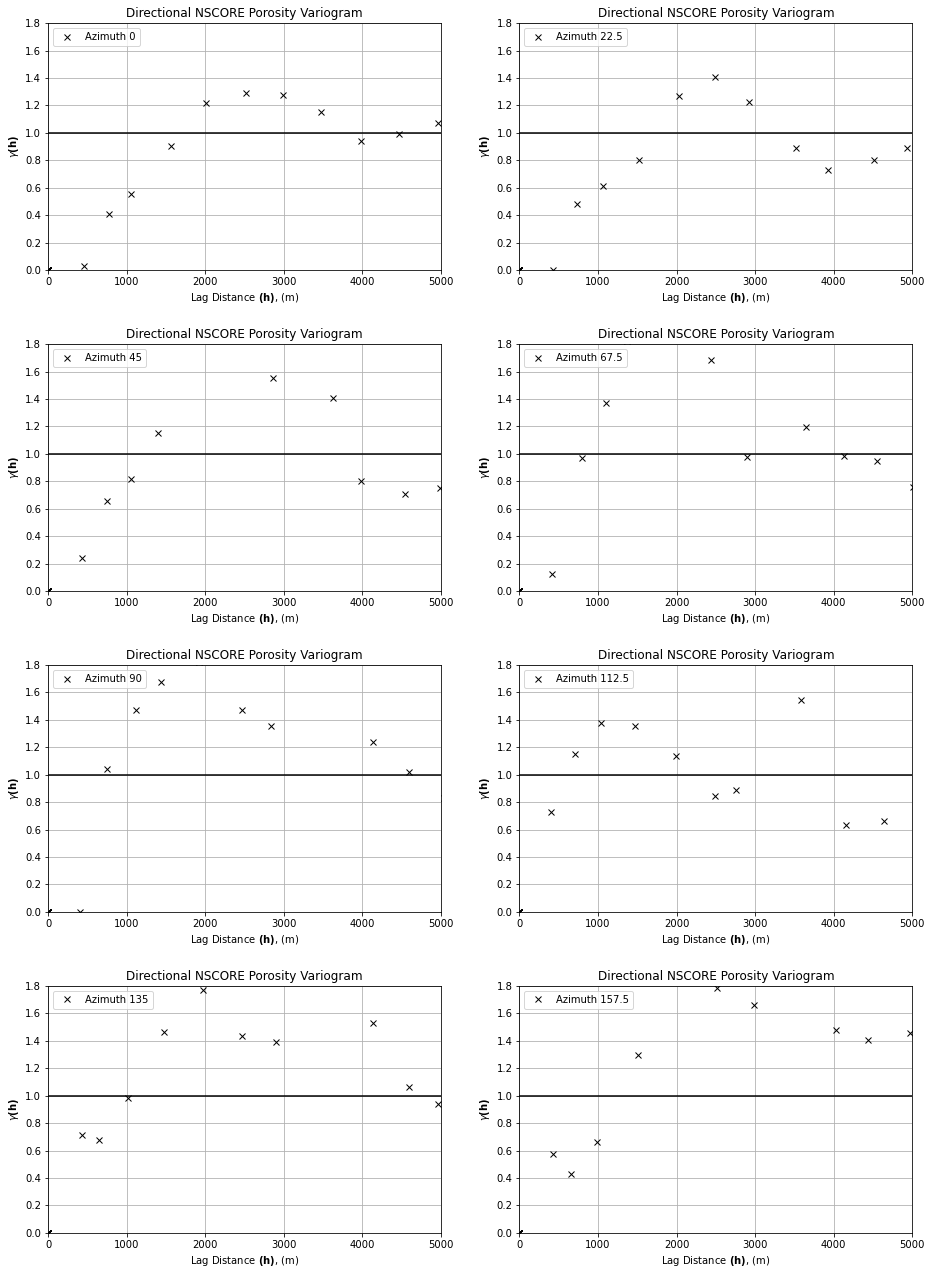

In [104]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df_0,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,5000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Porosity Variogram')
    plt.xlim([0,5000])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

lag_por = np.copy(lag)
gamma_por = np.copy(gamma)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 70.71067805519557,70.71067818211392
 x,y,z offsets = 70.71067830903228,-70.71067792827724


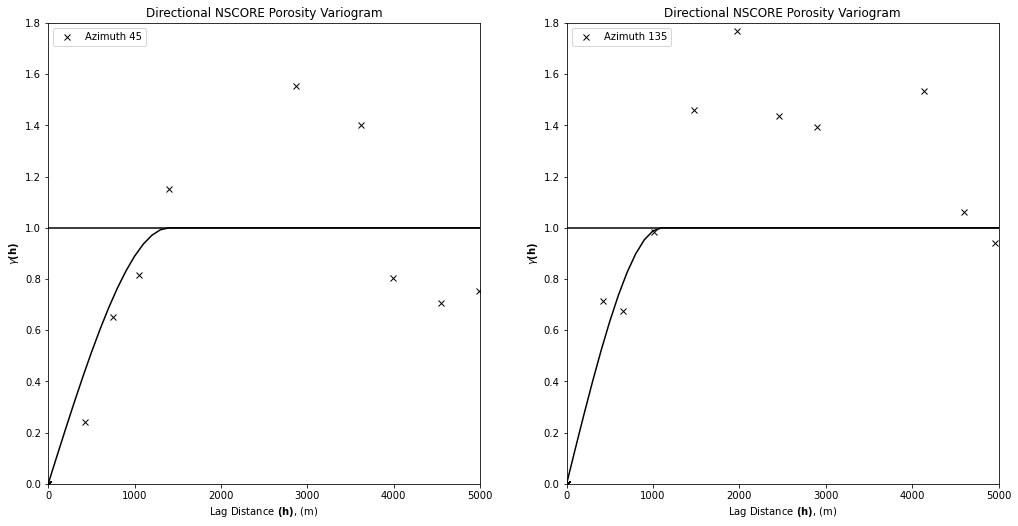

In [105]:
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 1400; hmin1 = 1100

por_0_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)
nlag = 70; xlag = 100; azm = 45; 
index45,h45,gam45,cov45,ro45 = vmodel(nlag,xlag,azm,por_0_vario)
azm = 135
index135,h135,gam135,cov135,ro135 = vmodel(nlag,xlag,azm,por_0_vario)

plt.subplot(1,2,1)
plt.plot(lag_por[2,:],gamma_por[2,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[2]))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_por[6,:],gamma_por[6,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[6]))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

### Porosity - Sandy shale

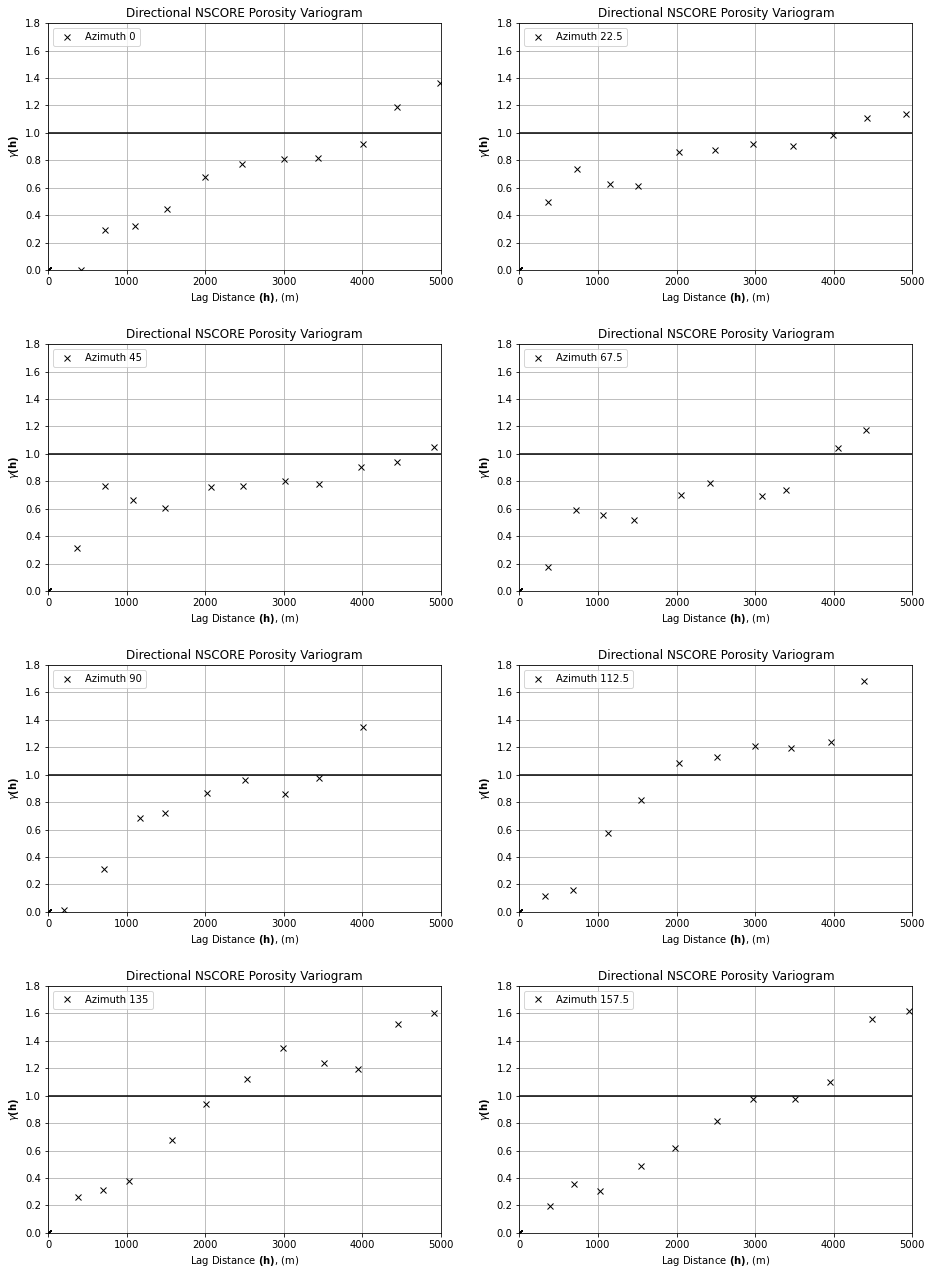

In [106]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df_1,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,5000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Porosity Variogram')
    plt.xlim([0,5000])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

lag_por = np.copy(lag)
gamma_por = np.copy(gamma)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 100.0,1.794896514920806e-07
 x,y,z offsets = 0.0,100.0


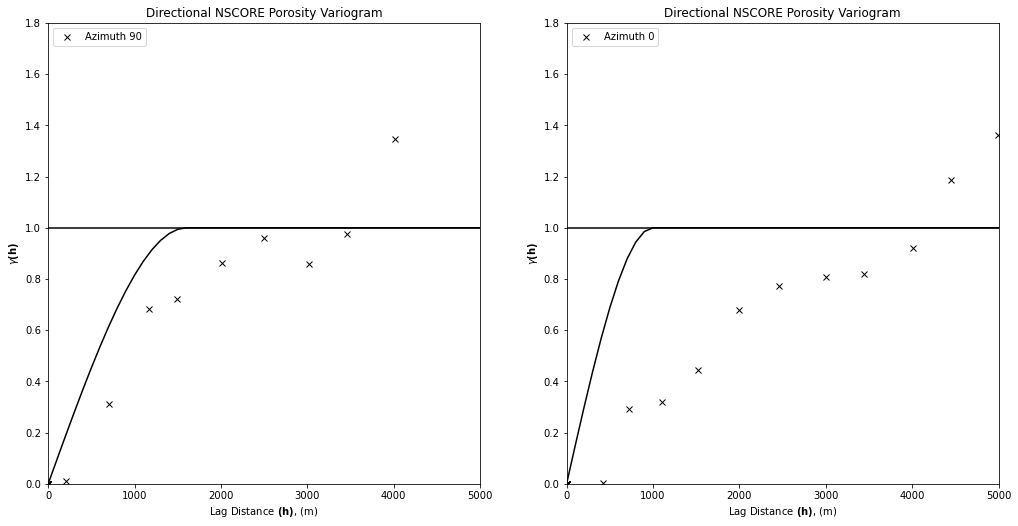

In [107]:
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 90; hmaj1 = 1600; hmin1 = 1000

por_1_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)
nlag = 70; xlag = 100; azm = 90; 
index45,h45,gam45,cov45,ro45 = vmodel(nlag,xlag,azm,por_1_vario)
azm = 0
index135,h135,gam135,cov135,ro135 = vmodel(nlag,xlag,azm,por_1_vario)

plt.subplot(1,2,1)
plt.plot(lag_por[4,:],gamma_por[4,:],'x',color = 'black',label = 'Azimuth ' +str(90))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_por[0,:],gamma_por[0,:],'x',color = 'black',label = 'Azimuth ' +str(0))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

### Porosity - Shaly sand

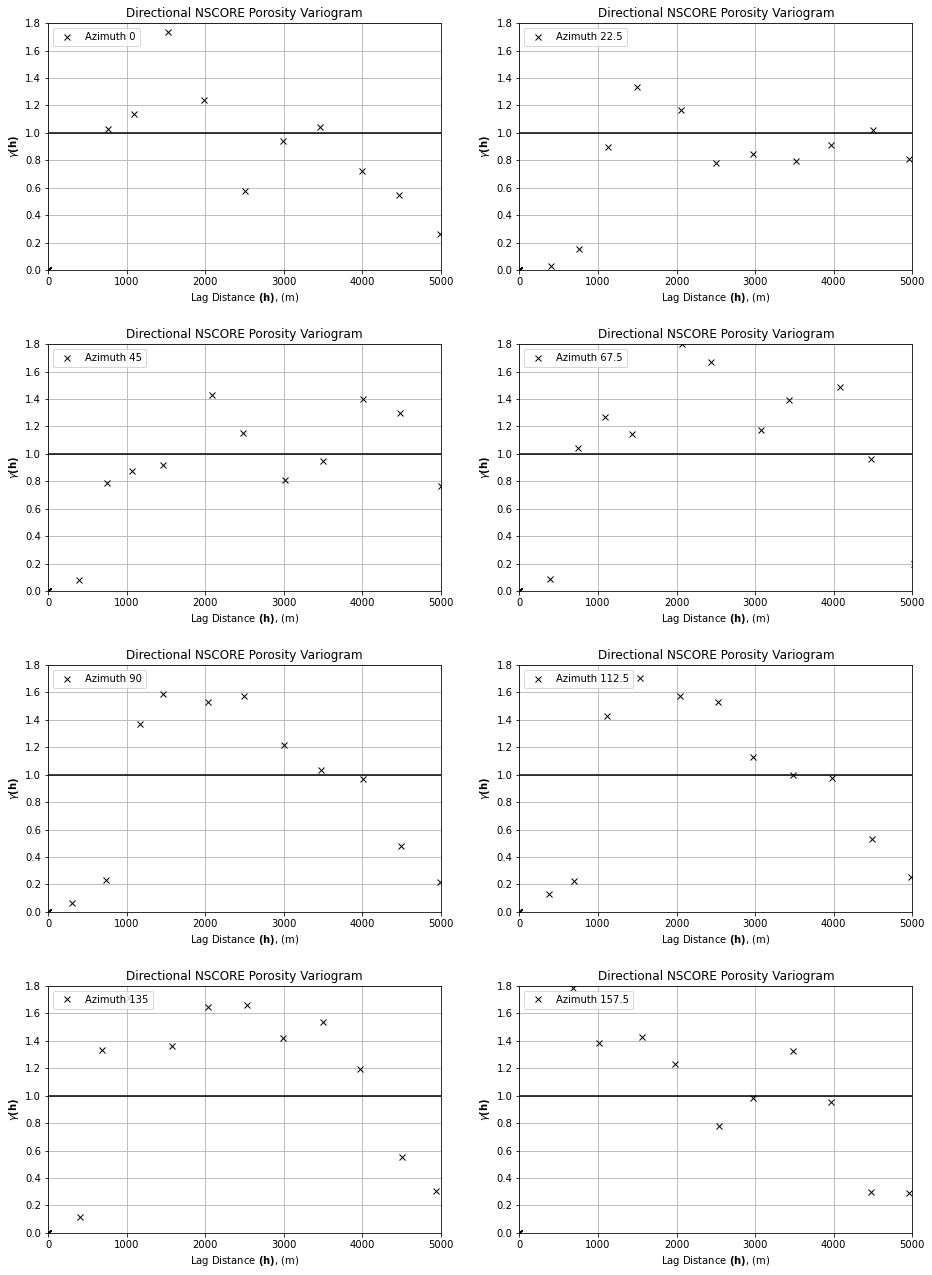

In [108]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df_2,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,5000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Porosity Variogram')
    plt.xlim([0,5000])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

lag_por = np.copy(lag)
gamma_por = np.copy(gamma)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 70.71067805519557,70.71067818211392
 x,y,z offsets = 70.71067830903228,-70.71067792827724


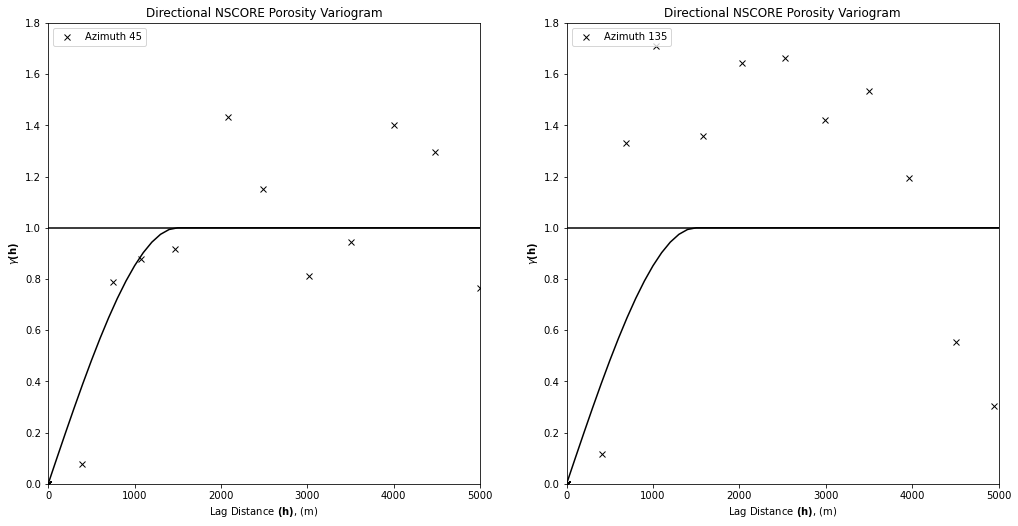

In [109]:
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 1500; hmin1 = 1500

por_2_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)
nlag = 70; xlag = 100; azm = 45; 
index45,h45,gam45,cov45,ro45 = vmodel(nlag,xlag,azm,por_2_vario)
azm = 135
index135,h135,gam135,cov135,ro135 = vmodel(nlag,xlag,azm,por_2_vario)

plt.subplot(1,2,1)
plt.plot(lag_por[2,:],gamma_por[2,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[2]))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_por[6,:],gamma_por[6,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[6]))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

### Porosity - Sand

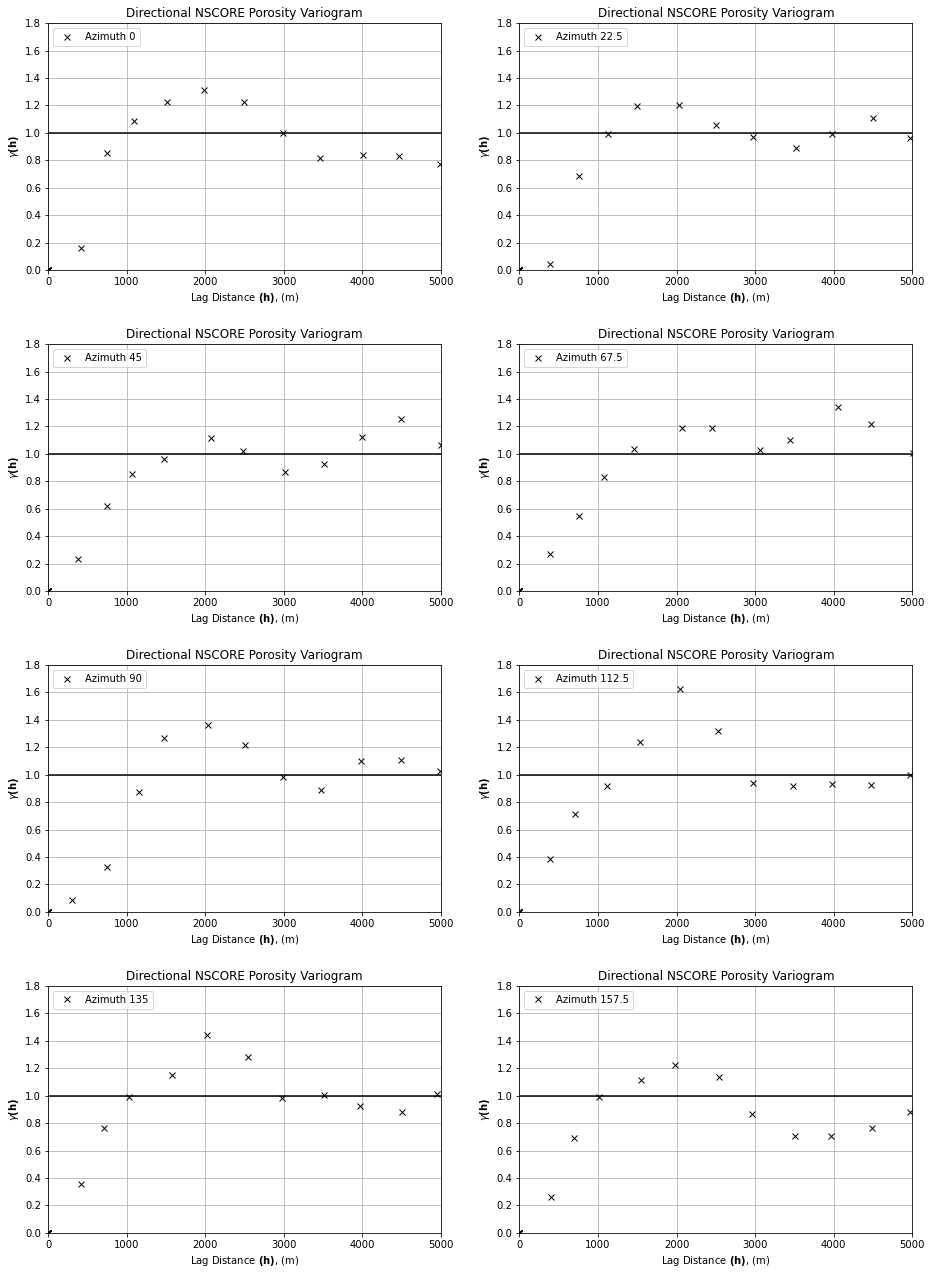

In [110]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df_3,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,5000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Porosity Variogram')
    plt.xlim([0,5000])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

lag_por = np.copy(lag)
gamma_por = np.copy(gamma)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 70.71067805519557,70.71067818211392
 x,y,z offsets = 70.71067830903228,-70.71067792827724


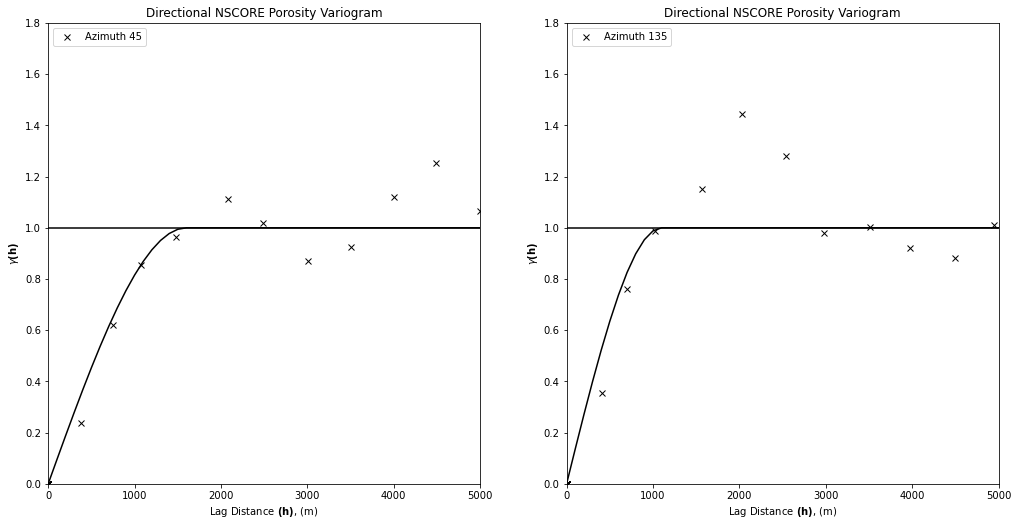

In [111]:
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 1600; hmin1 = 1100

por_3_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)
nlag = 70; xlag = 100; azm = 45; 
index45,h45,gam45,cov45,ro45 = vmodel(nlag,xlag,azm,por_3_vario)
azm = 135
index135,h135,gam135,cov135,ro135 = vmodel(nlag,xlag,azm,por_3_vario)

plt.subplot(1,2,1)
plt.plot(lag_por[2,:],gamma_por[2,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[2]))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_por[6,:],gamma_por[6,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[6]))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

## Permeability Modeling

In [119]:
df = static_well_dat[~np.isnan(static_well_dat['Perm'])].copy()

df_3 = pd.DataFrame.copy(df[df['lith_id'] == 3]).reset_index()
df_2 = pd.DataFrame.copy(df[df['lith_id'] == 2]).reset_index()
df_1 = pd.DataFrame.copy(df[df['lith_id'] == 1]).reset_index()
df_0 = pd.DataFrame.copy(df[df['lith_id'] == 0]).reset_index()

df_3 =df_3.groupby('Well_ID').mean().copy()
df_2 =df_2.groupby('Well_ID').mean().copy()
df_1 =df_1.groupby('Well_ID').mean().copy()
df_0 =df_0.groupby('Well_ID').mean().copy()


df_3['NPerm'], tvPor_3, tnsPor_3 = geostats.nscore(df_3, 'Perm')  # nscore transform for sand facies permeability
df_2['NPerm'], tvPor_2, tnsPor_2 = geostats.nscore(df_2, 'Perm')  # nscore transform for mixedsand facies permeability
df_1['NPerm'], tvPor_1, tnsPor_1 = geostats.nscore(df_1, 'Perm')  # nscore transform for mixedshale facies permeability
df_0['NPerm'], tvPor_0, tnsPor_0 = geostats.nscore(df_0, 'Perm')  # nscore transform for shale facies permeability



### Permeability - Shale

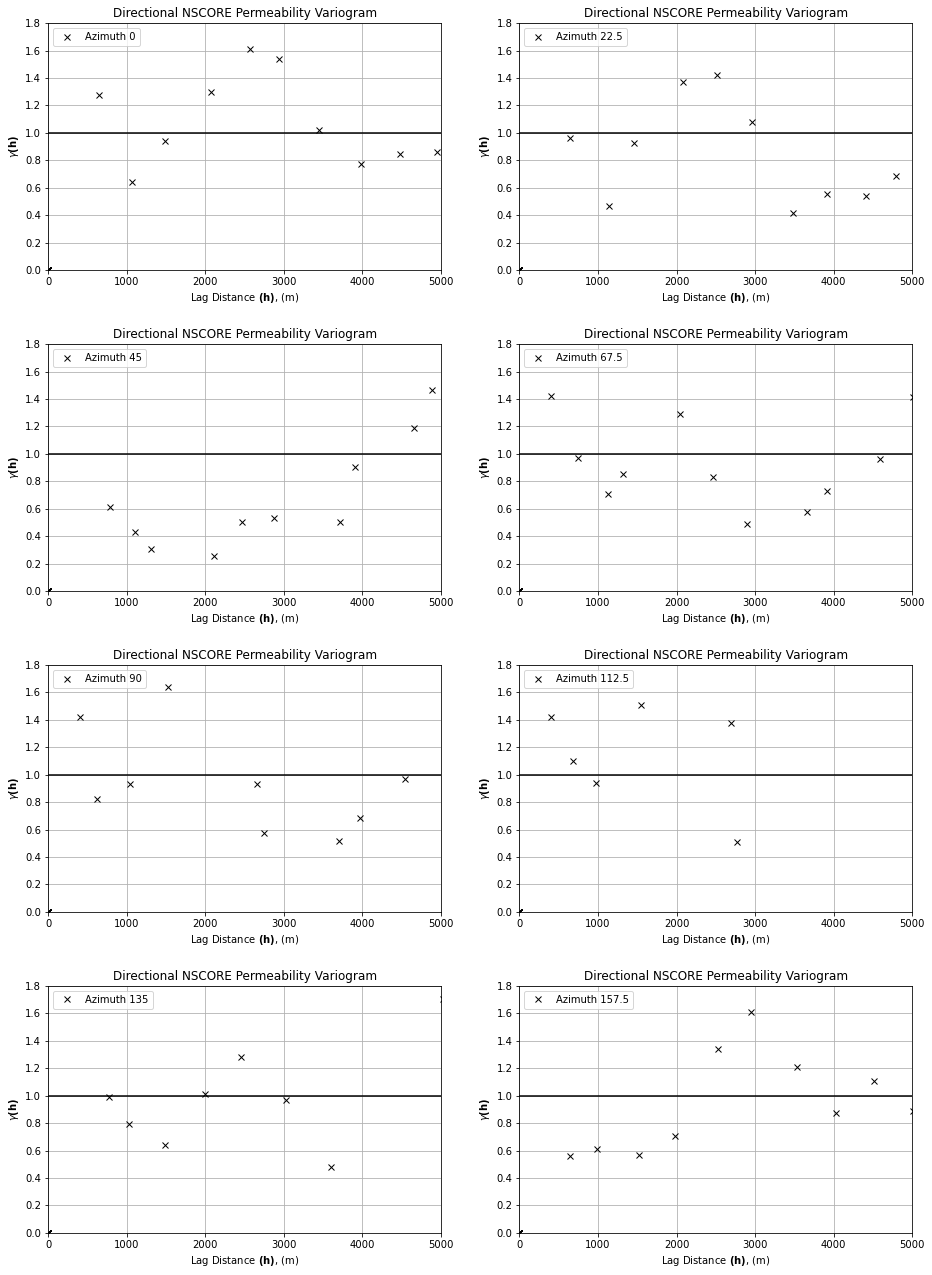

In [120]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df_0,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,5000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Permeability Variogram')
    plt.xlim([0,5000])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

lag_perm = np.copy(lag)
gamma_perm = np.copy(gamma)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 0.0,100.0
 x,y,z offsets = 100.0,1.794896514920806e-07


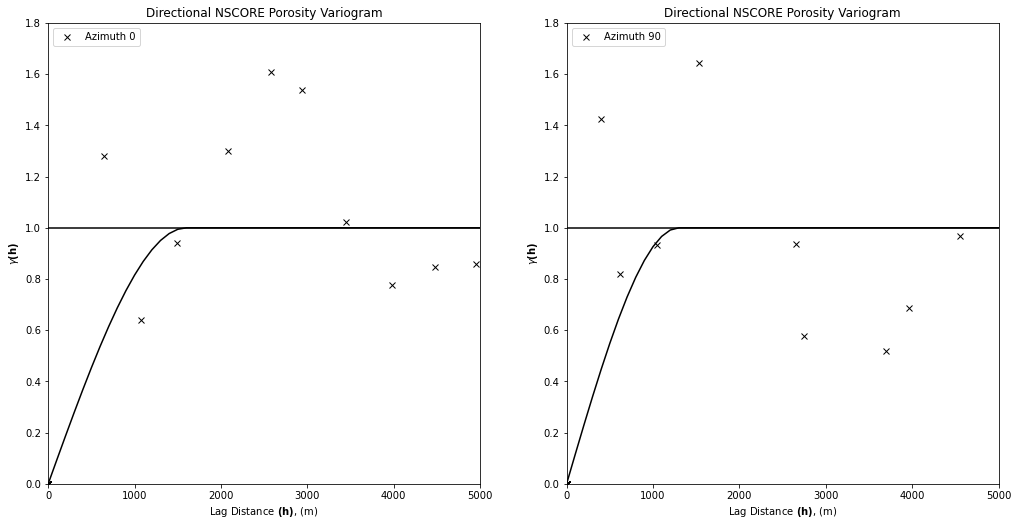

In [121]:
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 0; hmaj1 = 1600; hmin1 = 1300

perm_0_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)
nlag = 70; xlag = 100; azm = 0; 
index45,h45,gam45,cov45,ro45 = vmodel(nlag,xlag,azm,perm_0_vario)
azm = 90
index135,h135,gam135,cov135,ro135 = vmodel(nlag,xlag,azm,perm_0_vario)

plt.subplot(1,2,1)
plt.plot(lag_perm[0,:],gamma_perm[0,:],'x',color = 'black',label = 'Azimuth ' +str(azm-90))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_perm[4,:],gamma_perm[4,:],'x',color = 'black',label = 'Azimuth ' +str(azm))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

### Permeability - Sandy shale

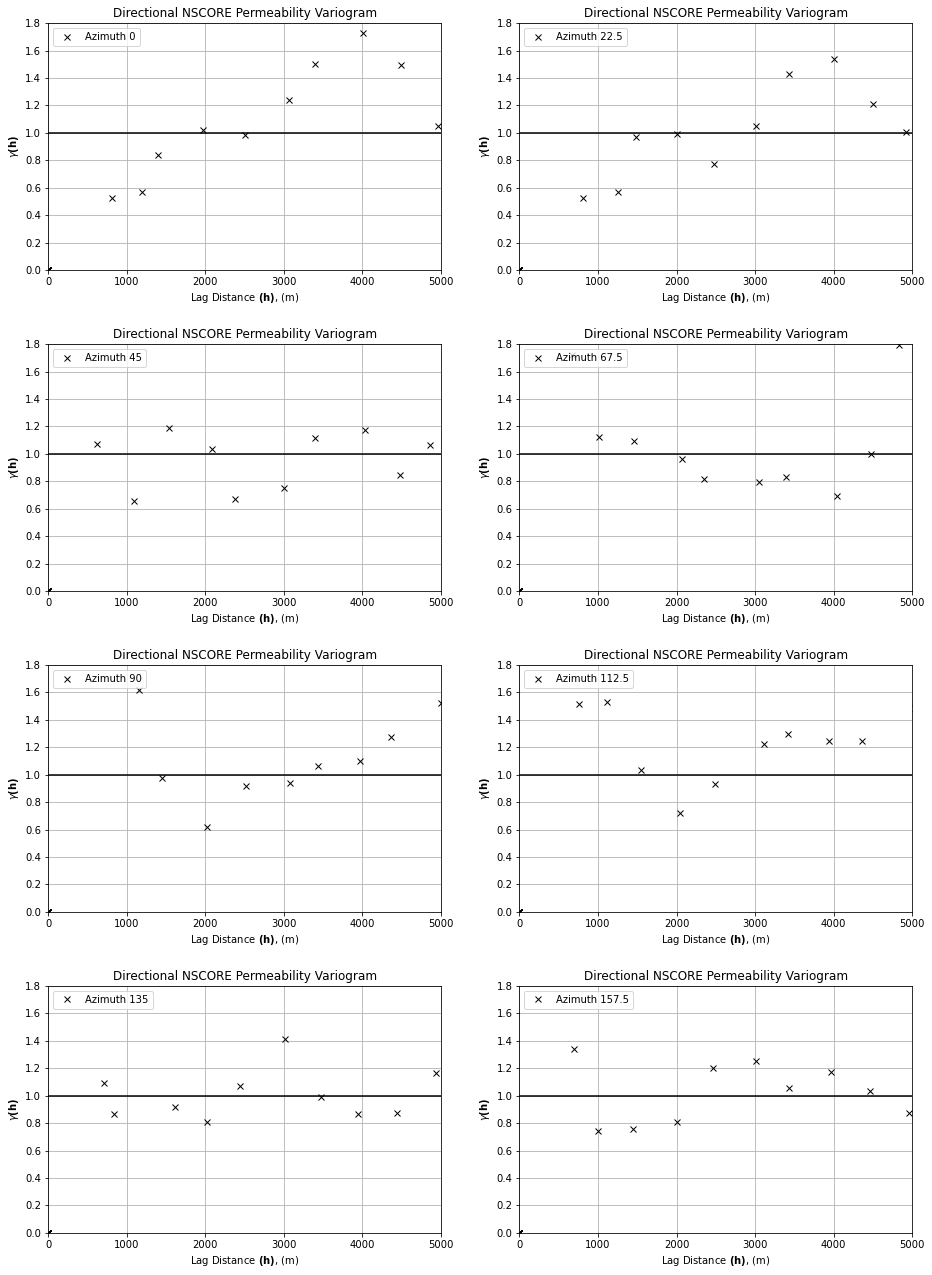

In [124]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df_1,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,5000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Permeability Variogram')
    plt.xlim([0,5000])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

lag_perm = np.copy(lag)
gamma_perm = np.copy(gamma)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 0.0,100.0
 x,y,z offsets = 100.0,1.794896514920806e-07


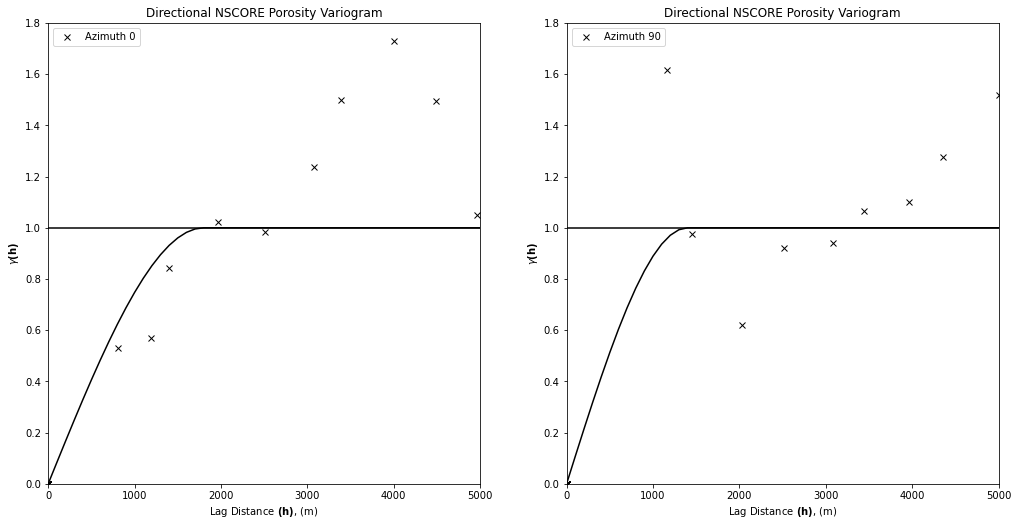

In [129]:
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 0; hmaj1 = 1800; hmin1 = 1400

perm_1_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)
nlag = 70; xlag = 100; azm = 0; 
index45,h45,gam45,cov45,ro45 = vmodel(nlag,xlag,azm,perm_1_vario)
azm = 90
index135,h135,gam135,cov135,ro135 = vmodel(nlag,xlag,azm,perm_1_vario)

plt.subplot(1,2,1)
plt.plot(lag_perm[0,:],gamma_perm[0,:],'x',color = 'black',label = 'Azimuth ' +str(azm-90))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_perm[4,:],gamma_perm[4,:],'x',color = 'black',label = 'Azimuth ' +str(azm))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

### Permeability - Shaly sand

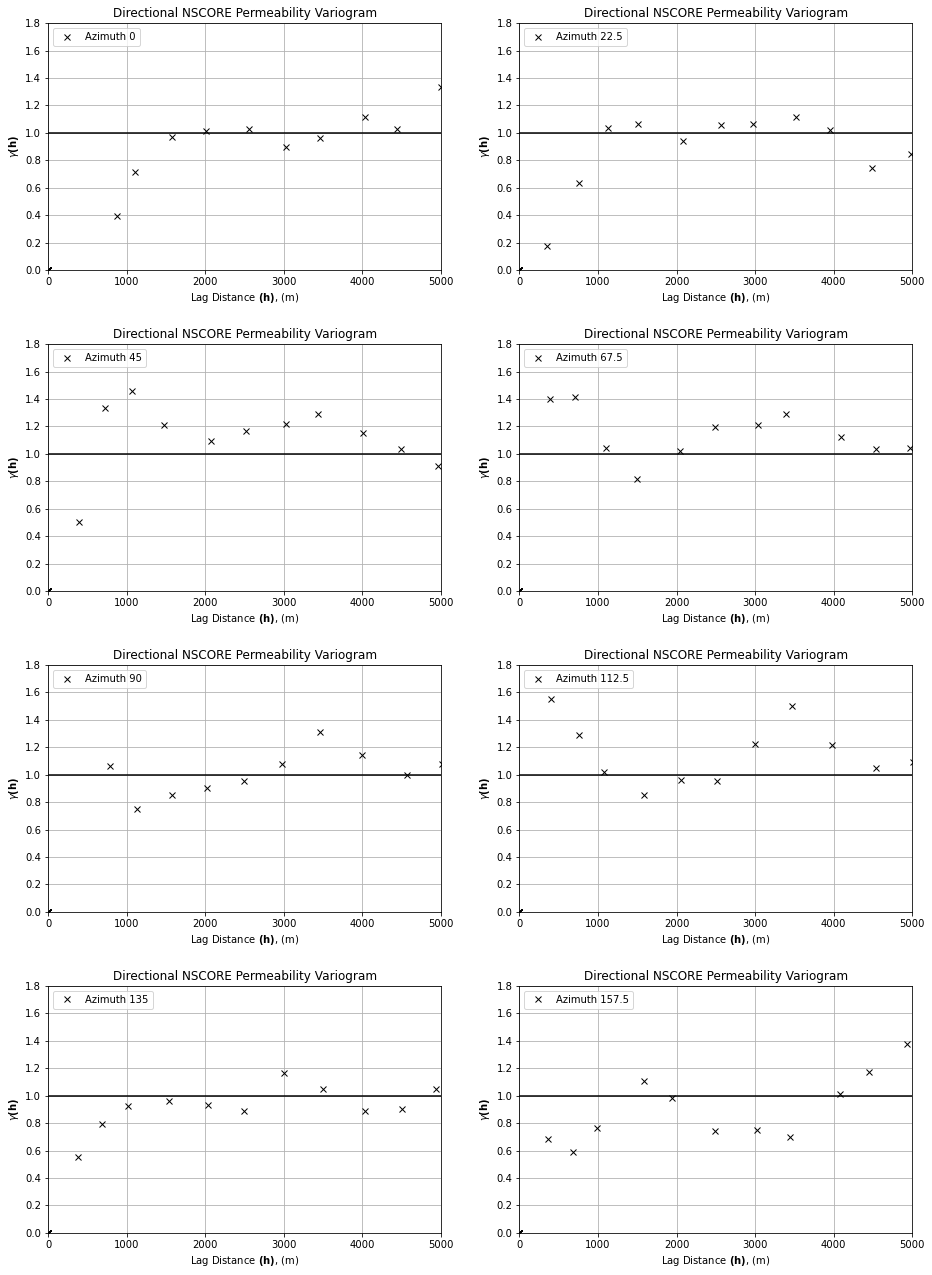

In [130]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df_2,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,5000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Permeability Variogram')
    plt.xlim([0,5000])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

lag_perm = np.copy(lag)
gamma_perm = np.copy(gamma)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 0.0,100.0
 x,y,z offsets = 100.0,1.794896514920806e-07


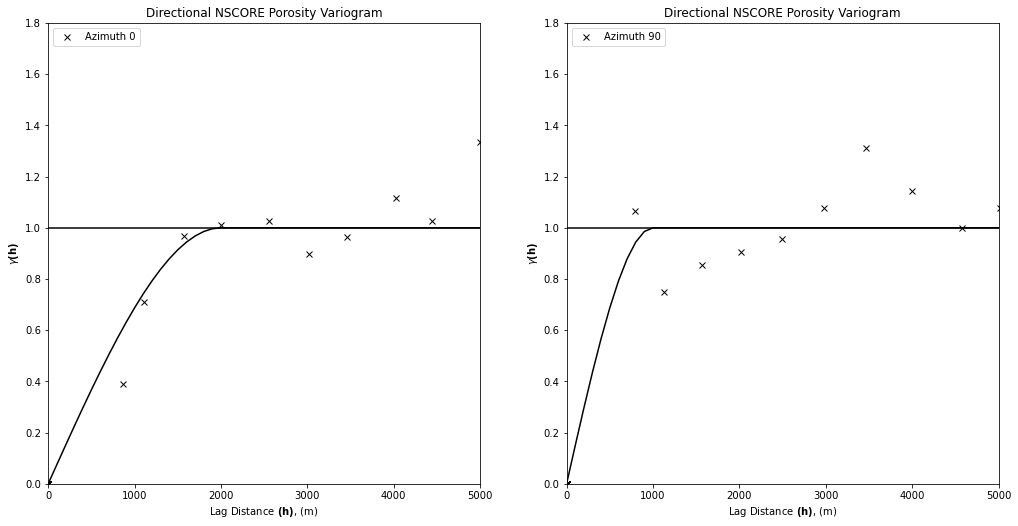

In [131]:
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 0; hmaj1 = 2000; hmin1 = 1000

perm_2_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)
nlag = 70; xlag = 100; azm = 0; 
index45,h45,gam45,cov45,ro45 = vmodel(nlag,xlag,azm,perm_2_vario)
azm = 90
index135,h135,gam135,cov135,ro135 = vmodel(nlag,xlag,azm,perm_2_vario)

plt.subplot(1,2,1)
plt.plot(lag_perm[0,:],gamma_perm[0,:],'x',color = 'black',label = 'Azimuth ' +str(azm-90))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_perm[4,:],gamma_perm[4,:],'x',color = 'black',label = 'Azimuth ' +str(azm))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

### Permeability - Sand

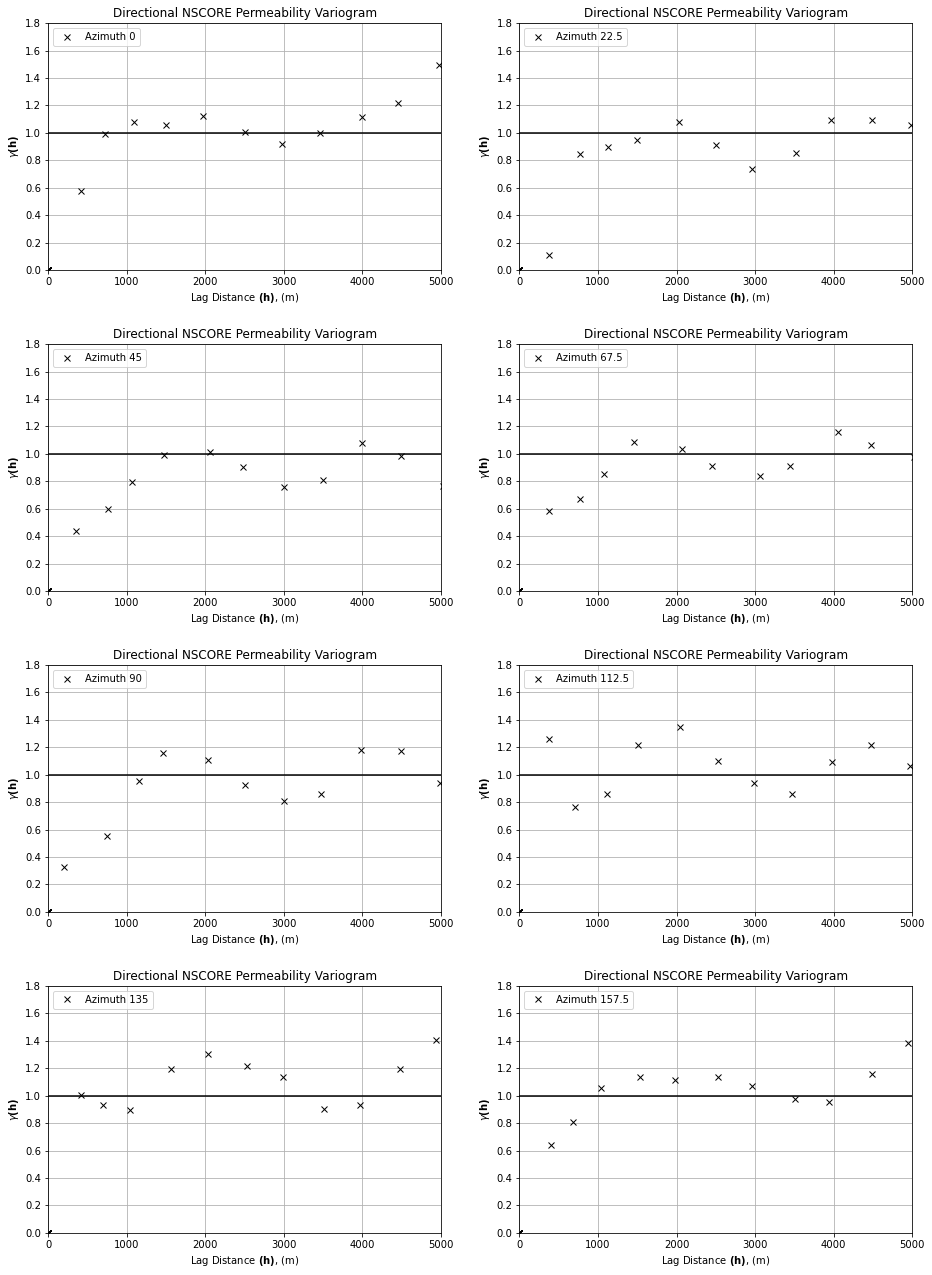

In [136]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df_3,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,5000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Permeability Variogram')
    plt.xlim([0,5000])
    plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

lag_perm = np.copy(lag)
gamma_perm = np.copy(gamma)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 100.0,1.794896514920806e-07
 x,y,z offsets = 0.0,100.0


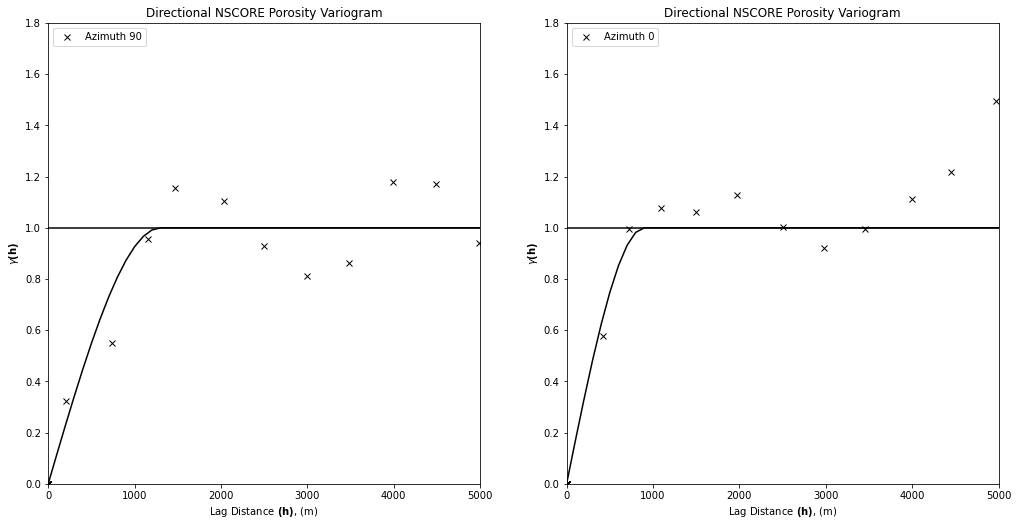

In [143]:
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 90; hmaj1 = 1300; hmin1 = 900

perm_3_vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1)
nlag = 70; xlag = 100; azm = 90; 
index45,h45,gam45,cov45,ro45 = vmodel(nlag,xlag,azm,perm_3_vario)
azm = 0
index135,h135,gam135,cov135,ro135 = vmodel(nlag,xlag,azm,perm_3_vario)

plt.subplot(1,2,1)
plt.plot(lag_perm[4,:],gamma_perm[4,:],'x',color = 'black',label = 'Azimuth ' +str(90))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag_perm[0,:],gamma_perm[0,:],'x',color = 'black',label = 'Azimuth ' +str(0))
plt.plot([0,5000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,5000])
plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()